In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.listdir()

['.DS_Store',
 'Skin Disease Classification.ipynb',
 'skin-disease-datasaet',
 'saved_models',
 'package-lock.json',
 'Api',
 '.ipynb_checkpoints',
 '.idea']

In [3]:
dataset_url='/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/skin-disease-datasaet/train_set'

In [4]:
os.listdir(dataset_url)

['.DS_Store',
 'FU-athlete-foot',
 'VI-chickenpox',
 'VI-shingles',
 'FU-nail-fungus',
 'BA-impetigo',
 'PA-cutaneous-larva-migrans',
 'FU-ringworm',
 'normal',
 'BA- cellulitis']

In [5]:
dataset_url

'/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/skin-disease-datasaet/train_set'

In [6]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

PosixPath('/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/skin-disease-datasaet/train_set')

In [7]:
cellulitis=list(data_dir.glob('BA- cellulitis/*'))
len(cellulitis)

136

In [8]:
FU_athlete_foot=list(data_dir.glob('FU-athlete-foot/*'))
len(FU_athlete_foot)

124

In [9]:
VI_chickenpoxt=list(data_dir.glob('VI-chickenpox/*'))
len(VI_chickenpoxt)

136

In [10]:
VI_shingles=list(data_dir.glob('VI-shingles/*'))
len(VI_shingles)

130

In [11]:
FU_nail_fungus=list(data_dir.glob('FU-nail-fungus/*'))
len(FU_nail_fungus)

129

In [12]:
BA_impetigo=list(data_dir.glob('BA-impetigo/*'))
len(BA_impetigo)

80

In [13]:
FU_ringworm=list(data_dir.glob('FU-ringworm/*'))
len(FU_ringworm)

90

In [14]:
normal=list(data_dir.glob('normal/*'))
len(normal)

213

In [15]:
PA_cutaneous_larva_migrans=list(data_dir.glob('PA-cutaneous-larva-migrans/*'))
len(PA_cutaneous_larva_migrans)

100

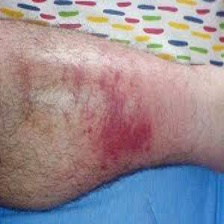

In [16]:
PIL.Image.open(str(cellulitis[0]))

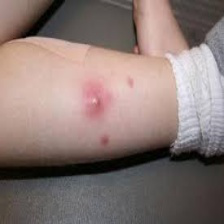

In [17]:
PIL.Image.open(str(cellulitis[16]))

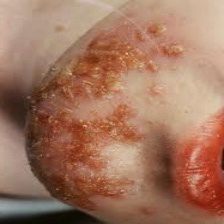

In [18]:
PIL.Image.open(str(BA_impetigo[16]))

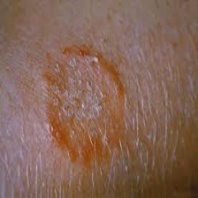

In [19]:
PIL.Image.open(str(FU_ringworm[4]))

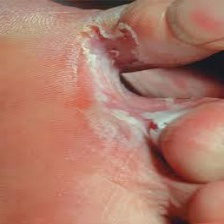

In [20]:
PIL.Image.open(str(FU_athlete_foot[16]))

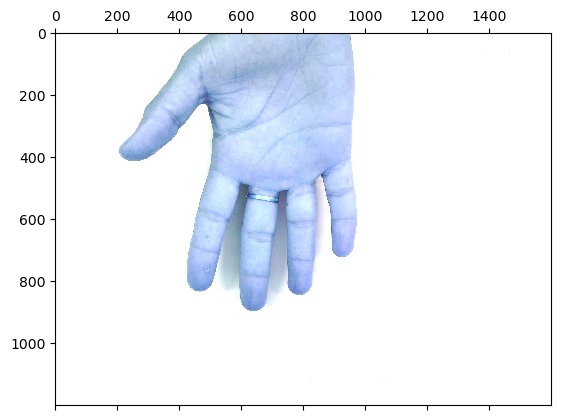

In [21]:
# PIL.Image.open(str(normal[16].resize((200,200))))
image=cv2.imread(str(normal[16]))
image=cv2.resize(image,(1600, 1200))

# # image = PIL.Image.open(str(normal[16])) 
# small_image =  
plt.matshow(image)


In [22]:
image.shape

(1200, 1600, 3)

In [23]:
cv2.imread(str( cellulitis[0])).shape[2]

3

In [24]:
disease_images_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
    'normal':list(data_dir.glob('normal/*')),   
}

In [25]:
disease_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
    'normal':8,
}

In [26]:
x_train = []
y_train = []

for image_name, image_paths in disease_images_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_train.append(image_resize)
        y_train.append(disease_label_dic[image_name])

In [27]:
x_train[0].shape

(224, 224, 3)

In [28]:
len(disease_images_dic['normal']),len(disease_images_dic['shingles'])

(213, 130)

In [29]:
len(x_train)

1136

In [30]:
len(y_train)

1136

In [31]:
y_train=np.array(y_train)
x_train=np.array(x_train)
y_train.shape

(1136,)

In [32]:
dataset_url='/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/skin-disease-datasaet'

In [33]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

PosixPath('/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/skin-disease-datasaet')

In [34]:
disease_images_dic={
    'cellulitis':list(data_dir.glob('test_set/BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('test_set/BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('test_set/FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('test_set/FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('test_set/FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('test_set/PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('test_set/VI-chickenpox/*')),
    'shingles':list(data_dir.glob('test_set/VI-shingles/*')),
    'normal':list(data_dir.glob('test_set/normal/*')),   
}
disease_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
    'normal':8,
}

In [35]:
x_test = []
y_test = []

for image_name, image_paths in disease_images_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_test.append(image_resize)
        y_test.append(disease_label_dic[image_name])

In [36]:
# x_train=np.array(x_train)
x_test=np.array(x_test)

In [37]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [38]:
x_train_scaled[0]

array([[[0.6627451 , 0.67058824, 0.70196078],
        [0.6627451 , 0.65882353, 0.69411765],
        [0.66666667, 0.63921569, 0.66666667],
        ...,
        [0.67843137, 0.67843137, 0.7254902 ],
        [0.61176471, 0.62352941, 0.67843137],
        [0.5372549 , 0.55686275, 0.61568627]],

       [[0.64313725, 0.65490196, 0.6745098 ],
        [0.65098039, 0.65098039, 0.6745098 ],
        [0.67058824, 0.64313725, 0.67058824],
        ...,
        [0.65490196, 0.6627451 , 0.70196078],
        [0.59215686, 0.61568627, 0.66666667],
        [0.52156863, 0.55294118, 0.60392157]],

       [[0.63137255, 0.64313725, 0.65882353],
        [0.65882353, 0.66666667, 0.67058824],
        [0.69411765, 0.68235294, 0.69019608],
        ...,
        [0.63529412, 0.65490196, 0.69019608],
        [0.59215686, 0.62745098, 0.66666667],
        [0.5372549 , 0.57647059, 0.61568627]],

       ...,

       [[0.64313725, 0.36470588, 0.09803922],
        [0.67843137, 0.40784314, 0.1372549 ],
        [0.6745098 , 0

## Using ANN

In [39]:
model=keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(224,224,3)),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(9,activation='sigmoid')
    ]
)

In [40]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
36/36 [==============================] - 8s 203ms/step - loss: 67.7637 - accuracy: 0.1752
Epoch 2/10
36/36 [==============================] - 7s 193ms/step - loss: 3.1135 - accuracy: 0.1048
Epoch 3/10
36/36 [==============================] - 7s 206ms/step - loss: 2.1912 - accuracy: 0.1100
Epoch 4/10
36/36 [==============================] - 7s 203ms/step - loss: 2.1879 - accuracy: 0.1725
Epoch 5/10
36/36 [==============================] - 8s 218ms/step - loss: 2.1876 - accuracy: 0.1893
Epoch 6/10
36/36 [==============================] - 7s 187ms/step - loss: 2.1899 - accuracy: 0.1910
Epoch 7/10
36/36 [==============================] - 12s 334ms/step - loss: 2.1787 - accuracy: 0.1937
Epoch 8/10
36/36 [==============================] - 7s 201ms/step - loss: 2.1754 - accuracy: 0.1963
Epoch 9/10
36/36 [==============================] - 7s 199ms/step - loss: 2.1766 - accuracy: 0.1937
Epoch 10/10
36/36 [==============================] - 7s 199ms/step - loss: 2.1637 - accuracy: 0.19

In [41]:
y_test=np.array(y_test)

In [42]:
model.evaluate(x_test_scaled,y_test)

11/11 [==============================] - 1s 57ms/step - loss: 3.3839 - accuracy: 0.4625


[3.383864641189575, 0.462462455034256]

In [46]:
y_predict=model.predict(x_test_scaled)
y_predicted_labels=[]
for i in y_predict:
    y_predicted_labels.append(np.argmax(i))
# y_predict[0]
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

11/11 [==============================] - 1s 59ms/step


<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[ 2,  0,  0,  0,  0,  0,  0,  0, 32],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33],
       [ 1,  0,  0,  0,  0,  0,  0,  0, 22],
       [ 4,  0,  0,  0,  0,  0,  0,  0, 21],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 99]], dtype=int32)>

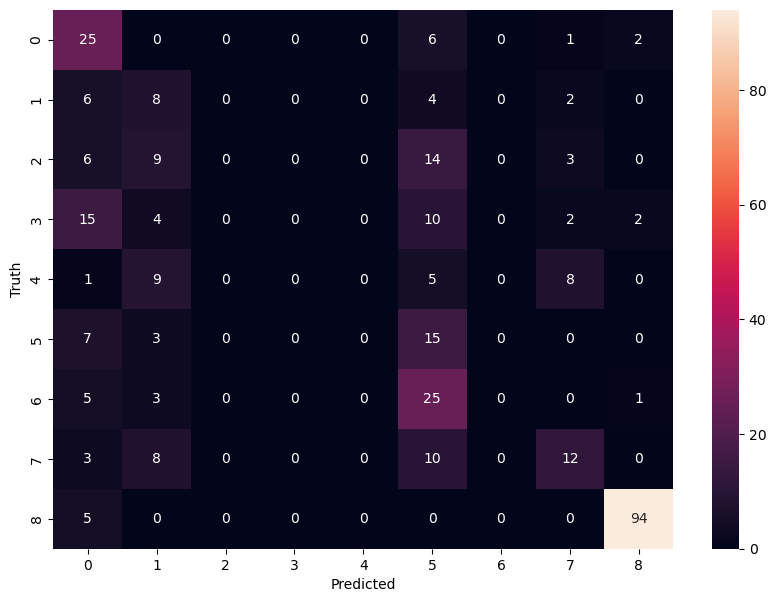

In [44]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [45]:
model.save("/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/ANN")

INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/ANN/assets


INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/ANN/assets


# CNN

In [46]:
cnn=keras.Sequential(
    [
#         CNN Layer
#         filters here means number of filters
#         kernel_size=(3,3) size of the filter
        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
#         In middle no need to specify the input shape
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(9,activation='softmax')
    ]
)
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
36/36 [==============================] - 40s 1s/step - loss: 2.8957 - accuracy: 0.3037
Epoch 2/10
36/36 [==============================] - 39s 1s/step - loss: 1.4000 - accuracy: 0.4842
Epoch 3/10
36/36 [==============================] - 33s 910ms/step - loss: 1.0253 - accuracy: 0.6505
Epoch 4/10
36/36 [==============================] - 33s 921ms/step - loss: 0.7012 - accuracy: 0.7606
Epoch 5/10
36/36 [==============================] - 32s 885ms/step - loss: 0.4317 - accuracy: 0.8794
Epoch 6/10
36/36 [==============================] - 31s 864ms/step - loss: 0.2556 - accuracy: 0.9349
Epoch 7/10
36/36 [==============================] - 34s 950ms/step - loss: 0.1120 - accuracy: 0.9745
Epoch 8/10
36/36 [==============================] - 30s 824ms/step - loss: 0.0671 - accuracy: 0.9859
Epoch 9/10
36/36 [==============================] - 36s 1s/step - loss: 0.0509 - accuracy: 0.9894
Epoch 10/10
36/36 [==============================] - 34s 954ms/step - loss: 0.0402 - accuracy: 0.996

In [47]:
cnn.evaluate(x_test_scaled,y_test)

11/11 [==============================] - 3s 214ms/step - loss: 0.7609 - accuracy: 0.8468


[0.7608643174171448, 0.8468468189239502]

In [48]:
y_predict=cnn.predict(x_test_scaled)
y_predicted_labels=[]
for i in y_predict:
    y_predicted_labels.append(np.argmax(i))
    
y_predicted_labels=np.array(y_predicted_labels)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

11/11 [==============================] - 3s 271ms/step


<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[28,  1,  0,  0,  0,  3,  0,  2,  0],
       [ 0, 14,  0,  2,  0,  0,  0,  4,  0],
       [ 1,  2, 26,  0,  0,  2,  0,  1,  0],
       [ 4,  2,  4, 19,  0,  1,  1,  2,  0],
       [ 2,  0,  0,  0, 12,  1,  1,  7,  0],
       [ 3,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 33,  0,  0],
       [ 1,  1,  0,  0,  1,  0,  1, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 99]], dtype=int32)>

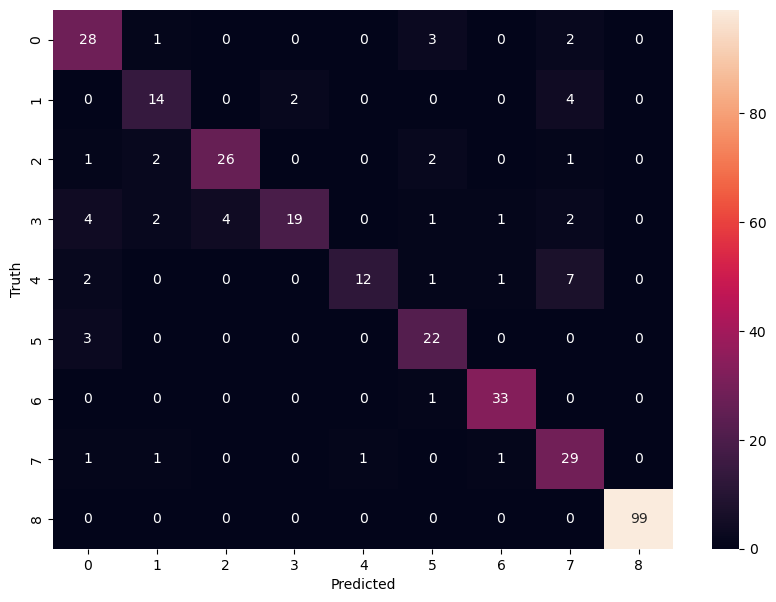

In [49]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [50]:
model.save("/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/CNN")

INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/CNN/assets


INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/CNN/assets


# Using Data Augmentation + Padding

In [84]:
data_augmentation=keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(224,224,3)),
        keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [87]:
model=keras.Sequential(
    [
        data_augmentation,
        keras.layers.Conv2D(filters=16,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Dropout(0.2),
        keras.layers.Flatten(),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(9,activation='softmax'),
    ]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy',
)
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
36/36 [==============================] - 17s 452ms/step - loss: 2.1858 - accuracy: 0.2535
Epoch 2/10
36/36 [==============================] - 17s 479ms/step - loss: 1.6758 - accuracy: 0.3662
Epoch 3/10
36/36 [==============================] - 18s 506ms/step - loss: 1.5504 - accuracy: 0.4225
Epoch 4/10
36/36 [==============================] - 17s 478ms/step - loss: 1.4008 - accuracy: 0.4824
Epoch 5/10
36/36 [==============================] - 17s 478ms/step - loss: 1.2489 - accuracy: 0.5528
Epoch 6/10
36/36 [==============================] - 17s 477ms/step - loss: 1.2256 - accuracy: 0.5660
Epoch 7/10
36/36 [==============================] - 18s 493ms/step - loss: 1.2272 - accuracy: 0.5634
Epoch 8/10
36/36 [==============================] - 17s 483ms/step - loss: 1.1412 - accuracy: 0.5942
Epoch 9/10
36/36 [==============================] - 18s 493ms/step - loss: 1.0104 - accuracy: 0.6611
Epoch 10/10
36/36 [==============================] - 17s 466ms/step - loss: 0.9663 - accura

In [88]:
model.evaluate(x_test_scaled,y_test)

11/11 [==============================] - 2s 133ms/step - loss: 0.9866 - accuracy: 0.6727


[0.9866191148757935, 0.672672688961029]

In [89]:
y_predict=model.predict(x_test_scaled)
y_predicted_labels=[]
for i in y_predict:
    y_predicted_labels.append(np.argmax(i))

confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

11/11 [==============================] - 1s 129ms/step


<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[19,  1,  1,  1,  0,  4,  4,  4,  0],
       [ 1,  2,  1,  3,  0,  0,  0, 13,  0],
       [ 0,  0, 23,  1,  0,  1,  3,  4,  0],
       [ 3,  0,  5, 17,  0,  2,  5,  0,  1],
       [ 0,  2,  3,  0,  6,  0,  2, 10,  0],
       [ 4,  2,  0,  1,  0, 10,  4,  4,  0],
       [ 1,  0,  0,  0,  0,  1, 31,  1,  0],
       [ 0,  1,  5,  3,  1,  0,  2, 21,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0, 95]], dtype=int32)>

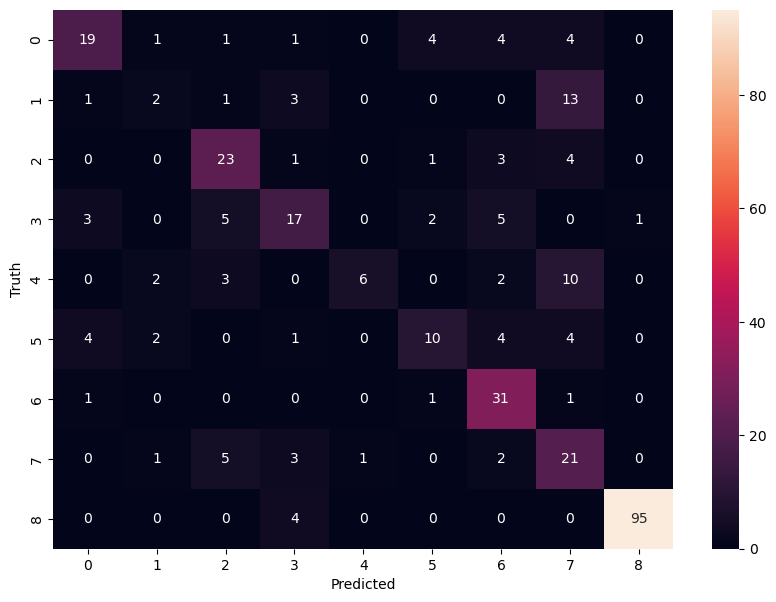

In [90]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [91]:
model.save("/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/augmentation")

INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/augmentation/assets


INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/augmentation/assets


# Trasfering Learning

In [93]:
import tensorflow_hub as hub

In [94]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224, 224, 3),
                                         trainable=False)  

In [95]:
x_train_scaled.shape

(1136, 224, 224, 3)

In [96]:
# y_train=np.array(y_train)
# y_test=np.array(y_test)

In [97]:
model=keras.Sequential(
    [
        feature_extractor_layer,
        keras.layers.Dense(9,activation='softmax')
    ]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy',
)
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
36/36 [==============================] - 17s 371ms/step - loss: 1.2120 - accuracy: 0.6136
Epoch 2/10
36/36 [==============================] - 13s 355ms/step - loss: 0.4008 - accuracy: 0.8900
Epoch 3/10
36/36 [==============================] - 12s 344ms/step - loss: 0.2462 - accuracy: 0.9472
Epoch 4/10
36/36 [==============================] - 12s 323ms/step - loss: 0.1702 - accuracy: 0.9718
Epoch 5/10
36/36 [==============================] - 12s 320ms/step - loss: 0.1246 - accuracy: 0.9815
Epoch 6/10
36/36 [==============================] - 12s 331ms/step - loss: 0.0936 - accuracy: 0.9921
Epoch 7/10
36/36 [==============================] - 12s 320ms/step - loss: 0.0756 - accuracy: 0.9947
Epoch 8/10
36/36 [==============================] - 12s 322ms/step - loss: 0.0603 - accuracy: 0.9965
Epoch 9/10
36/36 [==============================] - 12s 331ms/step - loss: 0.0505 - accuracy: 0.9974
Epoch 10/10
36/36 [==============================] - 12s 334ms/step - loss: 0.0433 - accura

In [98]:
y_test=np.array(y_test)

In [99]:
model.evaluate(x_test_scaled,y_test)

11/11 [==============================] - 4s 329ms/step - loss: 0.0891 - accuracy: 0.9850


[0.08911901712417603, 0.9849849939346313]

In [100]:
y_predict=model.predict(x_test_scaled)
# y_predict[0]
y_predicted_labels=[]
for i in y_predict:
    y_predicted_labels.append(np.argmax(i))
    
y_predicted_labels=np.array(y_predicted_labels)

11/11 [==============================] - 4s 329ms/step


In [101]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       1.00      1.00      1.00        20
           2       0.91      0.97      0.94        32
           3       0.97      1.00      0.99        33
           4       1.00      1.00      1.00        23
           5       1.00      0.88      0.94        25
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        33
           8       1.00      1.00      1.00        99

    accuracy                           0.98       333
   macro avg       0.98      0.98      0.98       333
weighted avg       0.99      0.98      0.98       333



In [102]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[33,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 23,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0, 22,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 99]], dtype=int32)>

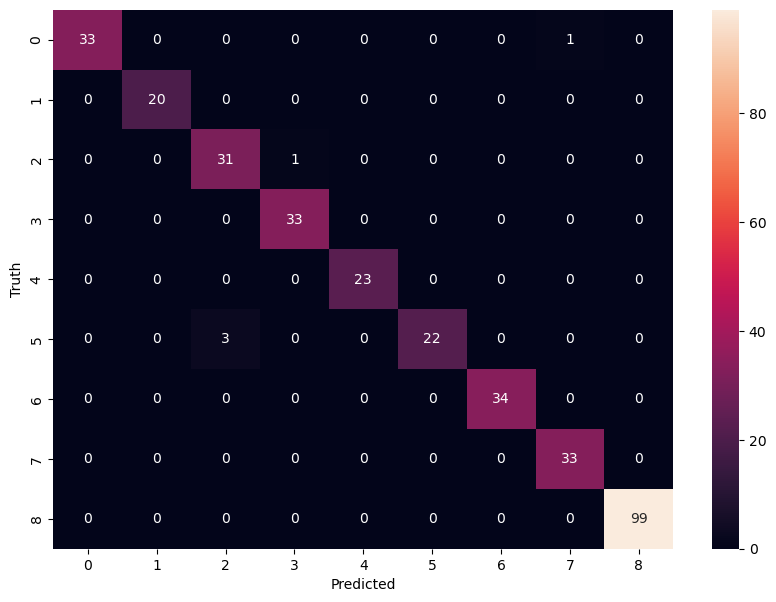

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [104]:
path='/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/skin-disease-datasaet/Testing'

In [105]:
import pathlib
data_dir=pathlib.Path(path)
data_dir

PosixPath('/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/skin-disease-datasaet/Testing')

In [106]:
testing_image_paths = list(data_dir.glob('*.jpg'))

In [107]:
len(testing_image_paths)

1

In [108]:
str(testing_image_paths[0])

'/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/skin-disease-datasaet/Testing/59_BA-impetigo (6).jpg'

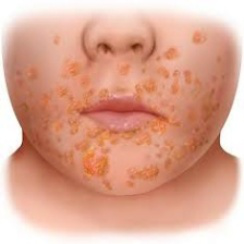

In [109]:
PIL.Image.open(str(testing_image_paths[0]))

In [47]:
img=cv2.imread(str(testing_image_paths[0]))
img_resize=cv2.resize(img,(224,224))
img_resize=np.array(img_resize)/255
img_resize.shape

NameError: name 'testing_image_paths' is not defined

In [111]:
predictions = model.predict(np.expand_dims(img_resize, axis=0))

1/1 [==============================] - 0s 34ms/step


In [112]:
predictions[0]

array([0.00155445, 0.8637425 , 0.00272235, 0.02674634, 0.00247888,
       0.00153523, 0.06830093, 0.03181333, 0.00110609], dtype=float32)

In [113]:
label_name=['cellulitis',
    'impetigo',
    'athlete-foot',
    'nail-fungus',
    'ringworm',
    'cutaneous-larva-migrans',
    'chickenpox',
    'shingles',
    'normal',]
label_name[np.argmax(predictions[0])]

'impetigo'

In [115]:
model.save("/Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/transfering")

INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/transfering/assets


INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/ML projects /DL /Minor Project work in Progrss/saved_models/transfering/assets
